In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statannot
import numpy as np


matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

### CellRox experiment

In [2]:
cr = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/DDR/CellRox.csv")
cr.columns = [s.split(".")[0] for s in cr.columns]

cr_long = pd.melt(cr, id_vars="Elapsed", value_vars=cr.columns[1:], var_name="Conditions", value_name="CollRox-Confluency Ratio")
cr_long.insert(1, "Cell Line", [s.split("-")[0] for s in cr_long["Conditions"]])
cr_long.insert(2, "Treatment", [s.split("-")[1] for s in cr_long["Conditions"]])
cr_long = cr_long.drop("Conditions", axis=1)
cr_long["CollRox-Confluency Ratio"] = np.log(cr_long["CollRox-Confluency Ratio"])
cr_long.head()

,Elapsed,Cell Line,Treatment,CollRox-Confluency Ratio
0,0,WT,UT,6.936124
1,4,WT,UT,7.155343
2,8,WT,UT,7.281543
3,12,WT,UT,7.380237
4,16,WT,UT,7.224329


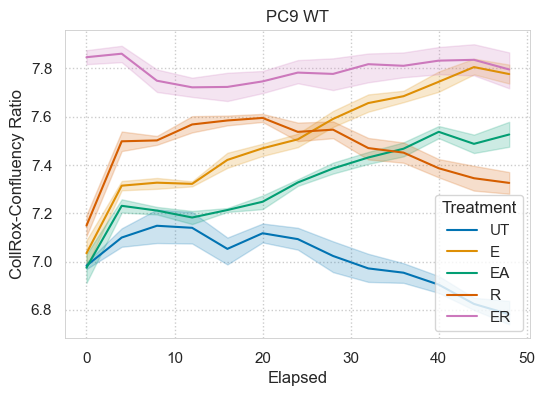

In [5]:
EAR = cr_long.set_index("Treatment").loc[["UT", "E", "EA", "R", "ER"]]

_, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.lineplot(EAR[(EAR["Cell Line"] == "WT") & (EAR["Elapsed"] <= 48)], x="Elapsed", y="CollRox-Confluency Ratio", hue="Treatment", ax=ax, errorbar=('ci', 63)).set_title("PC9 WT")
plt.savefig("CellRox.svg")

### H2Ax Foci Count

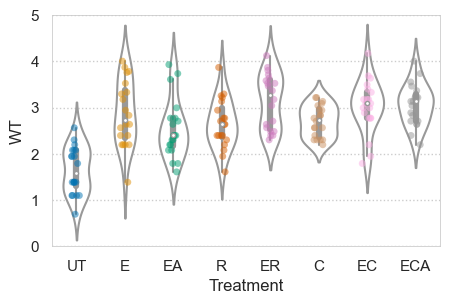

In [6]:
h2ax = pd.read_excel("/home/marcc/AXLomics/msresist/data/Validations/DDR/121222-H2AX_foci_counts.xlsx")
h2ax = h2ax.iloc[:, :2]
h2ax["WT"] = np.log(h2ax["WT"])
_, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.stripplot(h2ax, x="Treatment", y="WT", hue="Treatment", alpha=0.5)
sns.violinplot(h2ax, x="Treatment", y="WT", color="white")
ax.get_legend().remove()
ax.set_ylim(0, 5)
plt.savefig("CK2.svg")